In [2]:
# data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning & nltk library
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from statistics import mode
import pickle

In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [5]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


(5572, 2)
ham     4825
spam     747
Name: label, dtype: int64


<Axes: >

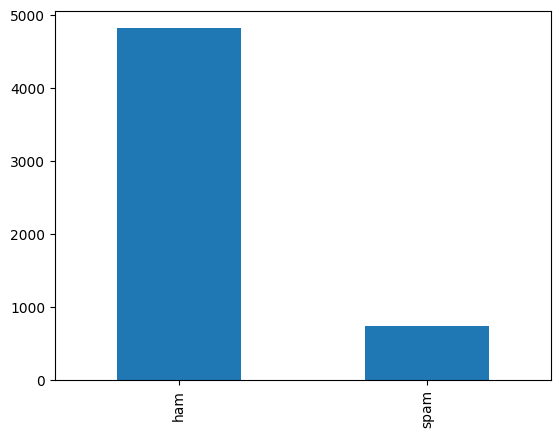

In [6]:
print(df.shape)
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [9]:
all_words = []
for index, row in df.iterrows():
    for word in word_tokenize(row['message']):
        all_words.append(word.lower())

# Calculate the frequency distribution of words
all_words_freq = nltk.FreqDist(all_words)

LookupError: ignored

In [10]:
!pip install nltk


In [12]:
# Make a bag of word and count the frequncy of the word
df = df.reset_index()


ValueError: ignored

In [13]:
# Tokenize words and create a bag of words
all_words = []
for index, row in df.iterrows():
    for word in word_tokenize(row['message']):
        all_words.append(word.lower())


LookupError: ignored

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
all_words = []
for index, row in df.iterrows():
    for word in word_tokenize(row['message']):
        all_words.append(word.lower())

In [16]:
all_words = nltk.FreqDist(all_words)

In [17]:
all_words.most_common(50)

[('.', 4886),
 ('i', 2900),
 ('to', 2241),
 ('you', 2228),
 (',', 1871),
 ('?', 1541),
 ('a', 1424),
 ('!', 1381),
 ('the', 1324),
 ('u', 1133),
 ('...', 1131),
 ('and', 977),
 ('&', 916),
 ('is', 898),
 ('in', 887),
 ('me', 804),
 (';', 764),
 ('my', 758),
 ('it', 732),
 (':', 717),
 ('for', 703),
 ('..', 681),
 ('your', 678),
 ('of', 619),
 ('have', 596),
 ('call', 576),
 ('that', 571),
 ('do', 544),
 ('on', 536),
 (')', 494),
 ("'s", 494),
 ('now', 494),
 ('are', 494),
 ('2', 485),
 ('so', 452),
 ('not', 440),
 ('but', 436),
 ('or', 417),
 ('can', 413),
 ('at', 403),
 ('we', 398),
 ("'m", 395),
 ('get', 385),
 ('if', 382),
 ('ur', 381),
 ('with', 380),
 ('be', 379),
 ('will', 379),
 ('just', 370),
 ("n't", 362)]

In [18]:
word_features = list(all_words.keys())[:3000]

In [19]:
# Make a documents that contains tokenized words and labels
documents = []
for index, row in df.iterrows():
    documents.append((word_tokenize(row['message']),row['label']))

In [20]:
# Make a feature set that shows which word was in the word_features
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features: # 3,000 frequent words
        features[w] = (w in words)
    return features

featuresets = [(find_features(message), label) for (message, label) in documents]

In [21]:
random.Random(4).shuffle(featuresets)

In [22]:
# divide training set and test set
training_set = featuresets[:5000]
testing_set =  featuresets[5000:]

In [23]:
# sklearn.naive_bayes : NaiveBayesClassifier, MultinomialNB,BernoulliNB
classifier = nltk.NaiveBayesClassifier.train(training_set)
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
BernoulliNB = SklearnClassifier(BernoulliNB())
BernoulliNB.train(training_set)

# sklearn.linear_model : LogisticRegression, SGDClassifier
LogisticRegression = SklearnClassifier(LogisticRegression())
LogisticRegression.train(training_set)
SGDClassifier = SklearnClassifier(SGDClassifier())
SGDClassifier.train(training_set)

# sklearn.svm : SVC, LinearSVC, NuSVC
SVC = SklearnClassifier(SVC())
SVC.train(training_set)
LinearSVC = SklearnClassifier(LinearSVC())

In [24]:
LinearSVC.train(training_set)

<SklearnClassifier(LinearSVC())>

In [26]:
class VoteClassifier(ClassifierI):
    def __init__(self,*classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        confidence_val = choice_votes / len(votes)
        return confidence_val

In [27]:
voted_classifier = VoteClassifier(classifier,
                                MNB_classifier,
                                BernoulliNB,
                                LogisticRegression,
                                SGDClassifier,
                                SVC,
                                LinearSVC)

print("voted_classifier Accuracy percent: ", (nltk.classify.accuracy(voted_classifier, testing_set)*100))
print("Classification: ", voted_classifier.classify(testing_set[0][0]), 'confidence %', voted_classifier.confidence(testing_set[0][0]) * 100)

voted_classifier Accuracy percent:  98.25174825174825
Classification:  ham confidence % 100.0


In [30]:
models = [classifier, MNB_classifier, BernoulliNB,LogisticRegression,SGDClassifier,SVC,LinearSVC, voted_classifier]
models_name = ['classifier', 'MNB_classifier', 'BernoulliNB','LogisticRegression','SGDClassifier','SVC','LinearSVC', 'voted_classifier']
accuracy_dict = {}

for idx, model in enumerate(models):
    accuracy_dict[models_name[idx]] = round(nltk.classify.accuracy(model, testing_set)*100,2)

{'classifier': 97.55, 'MNB_classifier': 97.38, 'BernoulliNB': 96.85, 'LogisticRegression': 98.25, 'SGDClassifier': 97.73, 'SVC': 97.55, 'LinearSVC': 97.73, 'voted_classifier': 98.25}


<Axes: >

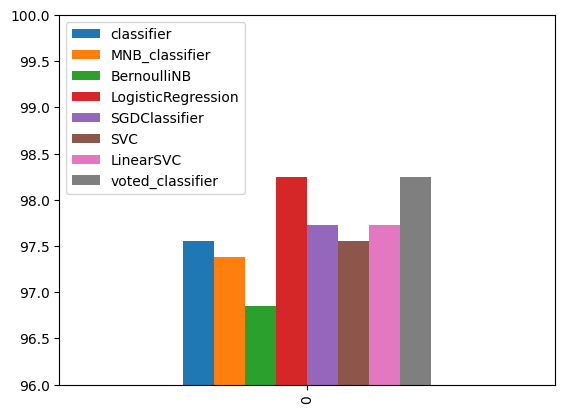

In [31]:
print(accuracy_dict)
df = pd.DataFrame(accuracy_dict, index=[0])
df.plot(kind = 'bar', ylim = [96,100])

In [32]:
#Generate the confusion matrix

models = [classifier,MNB_classifier,BernoulliNB,LogisticRegression,SGDClassifier,SVC,LinearSVC,voted_classifier]
matrixs = []

for model in models:
    y_pred  = []
    y_test = []
    for sample in testing_set:
        y_pred.append(model.classify(sample[0]))
        y_test.append(sample[1])
    matrixs.append(confusion_matrix(y_test, y_pred))

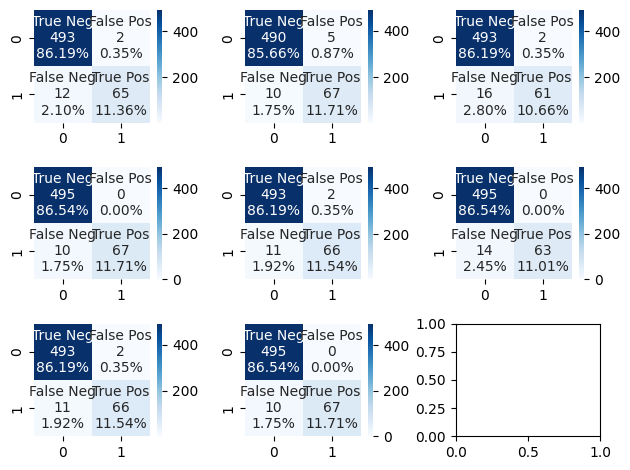

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

fig, axs = plt.subplots(nrows = 3, ncols=3)
for idx,matrix in enumerate(matrixs):

    group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         matrix.flatten()/np.sum(matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues', ax = axs[idx//3][idx%3])
plt.tight_layout()

In [34]:
# save in the pickle
save_classifier = open("voted_classifier.pickle", "wb")
pickle.dump(voted_classifier, save_classifier)
save_classifier.close()

In [35]:
classifier_f = open("voted_classifier.pickle", "rb")
voted_classifier = pickle.load(classifier_f)
classifier_f.close()


In [39]:
print("Pickled voted_classifier percent: ", (nltk.classify.accuracy(voted_classifier, testing_set)*100))
# we check the voted_classifier method, confidence, using the first dataset in training set
print("Classification: ", voted_classifier.classify(testing_set[1][0]), 'confidence %', voted_classifier.confidence(testing_set[1][0])* 100)

Pickled voted_classifier percent:  98.25174825174825
Classification:  ham confidence % 100.0
